## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [68]:
import sys,json
import glob, os
sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")

from stats_group_level import Stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [70]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    #config['list_subjects']=config["list_subjects_younger"]
config["seeds"]["seed_names"]=["frost_C5_VR_gmwm"]

### <font color=#4424D6> II. Initialize class based on this </font>

In [86]:
measure="MI"
stats=Stats(config,measure) # initialize the function

Unzip was already done please put redo=True to redo that step
Start the analysis on: 31 participants
targeted voxel's group mask: MNI_GM_3mm
['/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/1_first_level//frost_C5_VR_gmwm/MNI_GM_3mm_fc_maps/MI/mi_sub-P030_z.nii.gz', '/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/1_first_level//frost_C5_VR_gmwm/MNI_GM_3mm_fc_maps/MI/mi_sub-P099_z.nii.gz', '/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/1_first_level//frost_C5_VR_gmwm/MNI_GM_3mm_fc_maps/MI/mi_sub-A006_z.nii.gz', '/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/1_first_level//frost_C5_VR_gmwm/MNI_GM_3mm_fc_maps/MI/mi_sub-A007_z.nii.gz', '/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/1_first_level//frost_C5_VR_gmwm/MNI_GM_3mm_fc_maps/MI/mi_sub-A008_z.nii.gz'

## <font color=#B2D732> <span style="background-color: #4424D6"> Statistics
#### <font color=#4424D6> One sample t-test - nilearn

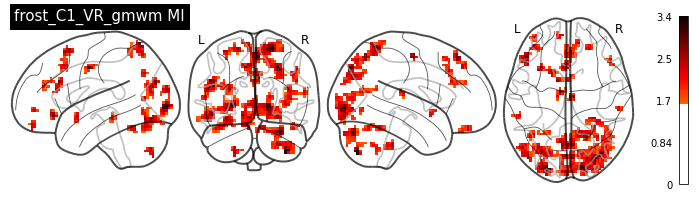

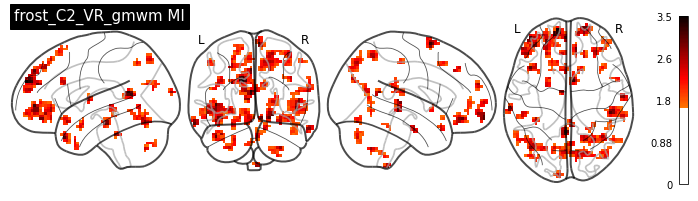

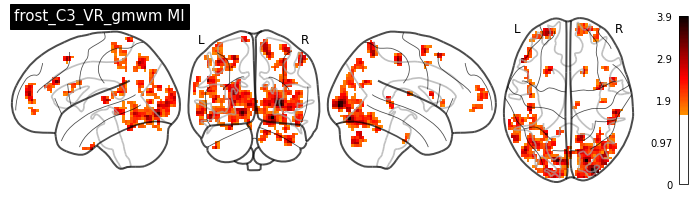

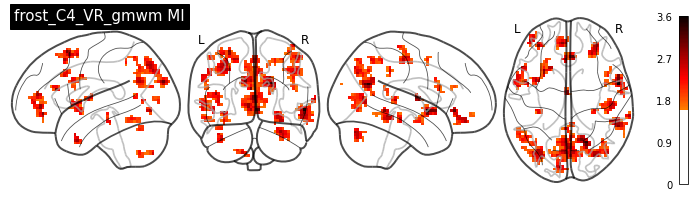

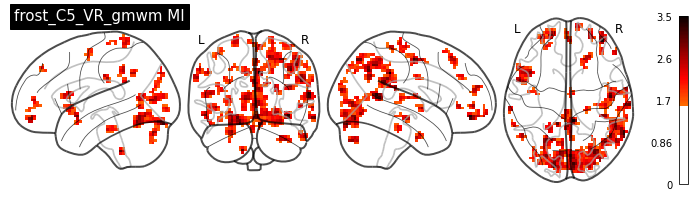

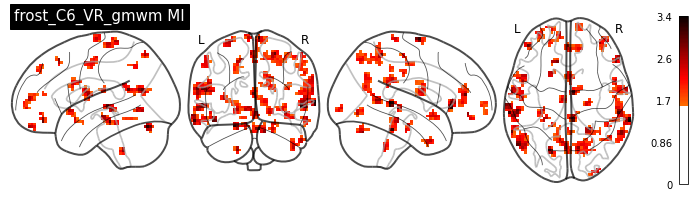

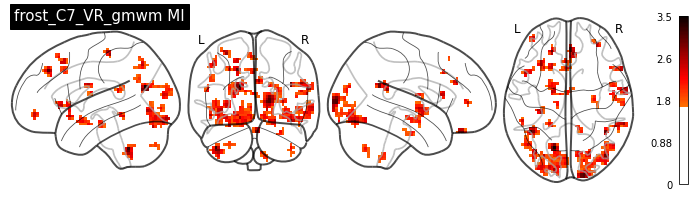

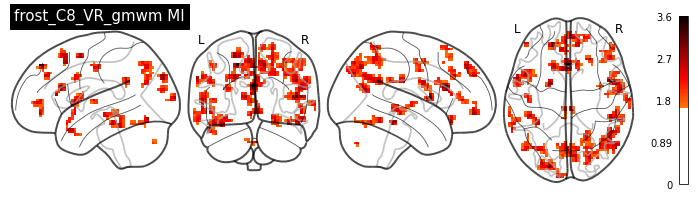

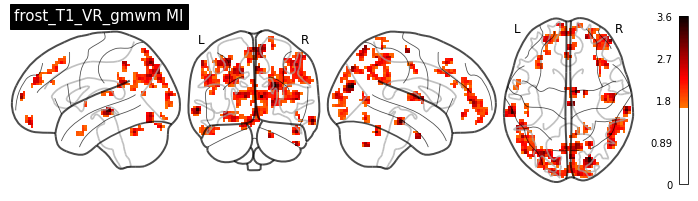

In [91]:
config["seeds"]["seed_names"]=["frost_C1_VR_gmwm","frost_C2_VR_gmwm","frost_C3_VR_gmwm","frost_C4_VR_gmwm","frost_C5_VR_gmwm","frost_C6_VR_gmwm","frost_C7_VR_gmwm","frost_C8_VR_gmwm","frost_T1_VR_gmwm"]

for seed_name in config["seeds"]["seed_names"]:
    stats.OneSampT(seed_name,z_thr=2,p_value=0.05,corr="fpr",smoothing=None,parametric=True,plot_matrix=False,plot_stats_uncorr=True)



In [77]:
from nilearn.glm.second_level import non_parametric_inference

out_dict = non_parametric_inference(
    second_level_input,
    design_matrix=design_matrix,
    model_intercept=True,
    n_perm=500,  # 500 for the sake of time. Ideally, this should be 10,000.
    two_sided_test=False,
    smoothing_fwhm=8.0,
    threshold=1,
    n_jobs=1,
)

TypeError: non_parametric_inference() got an unexpected keyword argument 'threshold'

In [78]:
out_dict["logp_max_t"]

TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_fdata()[slice]`

In [48]:
import itertools

threshold = 1  # p < 0.1
vmax = 2.69  # ~= -np.log10(1 / 500)

cut_coords = [0]

IMAGES = [
    neg_log_pval,
    out_dict["logp_max_t"],
    out_dict["logp_max_size"],
    out_dict["logp_max_mass"],
]
TITLES = [
    "Parametric Test",
    "Permutation Test\n(Voxel-Level Error Control)",
    "Permutation Test\n(Cluster-Size Error Control)",
    "Permutation Test\n(Cluster-Mass Error Control)",
]

fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=2)
for img_counter, (i_row, j_col) in enumerate(
    itertools.product(range(2), range(2))
):
    ax = axes[i_row, j_col]
    plotting.plot_glass_brain(
        IMAGES[img_counter],
        colorbar=True,
        vmax=vmax,
        display_mode="z",
        plot_abs=False,
        cut_coords=cut_coords,
        threshold=threshold,
        figure=fig,
        axes=ax,
    )
    ax.set_title(TITLES[img_counter])
fig.suptitle("Group left-right button press\n(negative log10 p-values)")
plt.show()


TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_fdata()[slice]`

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


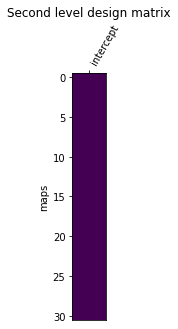

In [53]:
design_matrix = pd.DataFrame([1] * 31,columns=["intercept"])
        
ax = plot_design_matrix(design_matrix)
ax.set_title("Second level design matrix", fontsize=12)
ax.set_ylabel("maps")
plt.tight_layout()
plt.show()

In [135]:
for seed_name in config["seeds"]["seed_names"]:
    stats.Snpm_OneSampT(seed_name=seed_name,permutation=500,t_thr=2.03)

Number of permutation: 500
Threshold: 2.03
One Sample T test done


In [ ]:
for ana in ["Corr"]:
    for seed_name in ["spinalcord_C2"]:
        print(seed_name)
        
    
        output_dir=config["second_level"] + config["targeted_voxels"]["target_name"] + '/'+seed_name +'/'+ana+'/randomise/'
        print(output_dir)
        input_file=glob.glob(config["first_level"]+  seed_name +'/'+config["targeted_voxels"]["target_name"] + "_fc_maps/"+ana+"/*_31subjects_seed_*_s.nii")[0]
        if not os.path.exists(ouput_dir):
            os.mkdir(ouput_dir)
        
        string="randomise -i "+input_file+" -o " + output_dir+ "_" +seed_name +" -1 -v 6 -n 100  -T"
        os.system(string)

spinalcord_C2
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/spring_2023/2_second_level/MNI_GM_3mm/spinalcord_C2/Corr/randomise/
